In [71]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.experimental.numpy as tnp
import timeit

print("Using TensorFlow version %s" % tf.__version__)

Using TensorFlow version 2.11.0


In [72]:
tensor1 = tf.ones([1,2,3])  # tf.ones() creates a shape [1,2,3] tensor full of ones

In [73]:
tensor1.shape

TensorShape([1, 2, 3])

In [74]:
print(tensor1)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)


In [75]:
tensor2 = tf.ones([2,3])  # tf.ones() creates a shape [1,2,3] tensor full of ones

In [76]:
print(tensor2)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


In [77]:
tensor2.shape

TensorShape([2, 3])

[0, 6, 0, 20]

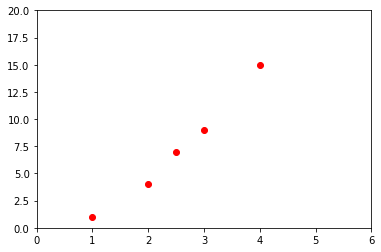

In [78]:
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

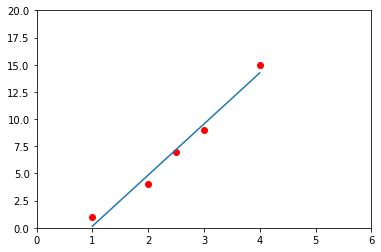

In [79]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [80]:
!pip install -q sklearn

In [81]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc


In [82]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [83]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB


In [84]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [85]:
dftrain.shape

(627, 9)

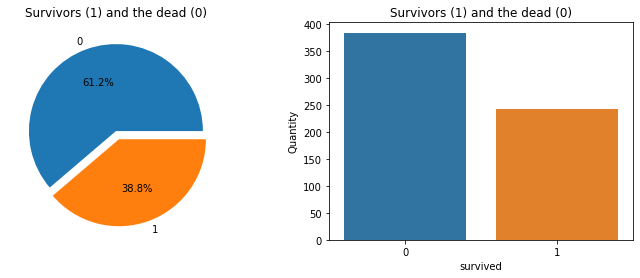

In [86]:
import seaborn as sns

dftrain_with_sur = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
dftrain_with_sur['survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot('survived', data=dftrain_with_sur, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors (1) and the dead (0)')
plt.show()

In [137]:
#Look at survival rate by sex and class
dftrain_with_sur.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.971014,0.909091,0.559140
male,0.377778,0.111111,0.129032


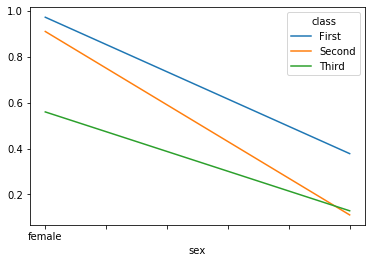

In [138]:
#Look at survival rate by sex and class visually
dftrain_with_sur.pivot_table('survived', index='sex', columns='class').plot()

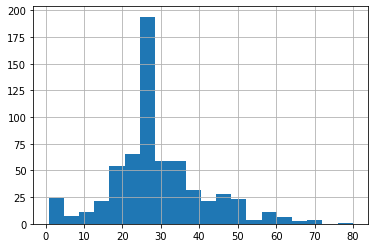

In [87]:
dftrain.age.hist(bins=20)

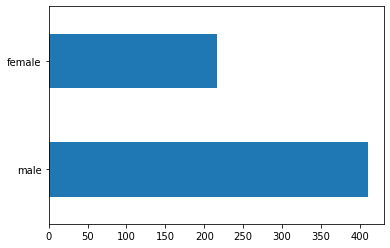

In [88]:
dftrain.sex.value_counts().plot(kind='barh')

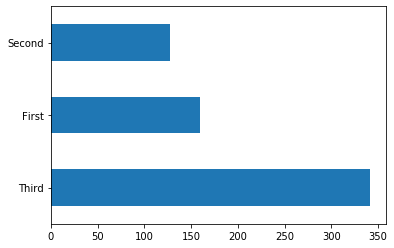

In [89]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

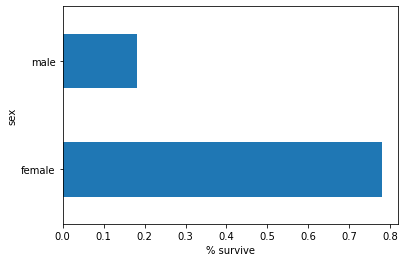

In [90]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [91]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age','fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [92]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


In [93]:
ds = make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
  print('Some feature keys:', list(feature_batch.keys()))
  print()
  print('A batch of class:', feature_batch['class'].numpy())
  print()
  print('A batch of Labels:', label_batch.numpy())

Some feature keys: ['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

A batch of class: [b'Third' b'First' b'First' b'First' b'First' b'Second' b'First' b'Third'
 b'Third' b'Third']

A batch of Labels: [0 0 1 1 1 1 1 0 0 1]


In [94]:
for num in range(0, 9):
    print(feature_columns[num].key)

sex
n_siblings_spouses
parch
class
deck
embark_town
alone
age
fare


In [95]:
age_column = feature_columns[8]
tf.keras.layers.DenseFeatures([age_column])(feature_batch).numpy()

array([[ 19.9667],
       [ 26.55  ],
       [ 56.9292],
       [ 26.55  ],
       [ 30.    ],
       [ 41.5792],
       [164.8667],
       [  7.8958],
       [  7.75  ],
       [ 12.475 ]], dtype=float32)

In [96]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimator by passing the feature columns we created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\GEO_AD~1\\AppData\\Local\\Temp\\tmpi149ioft', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [97]:
print(linear_est)

In [98]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.7386364


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\GEO_AD~1\AppData\Local\Temp\tmpi149ioft\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


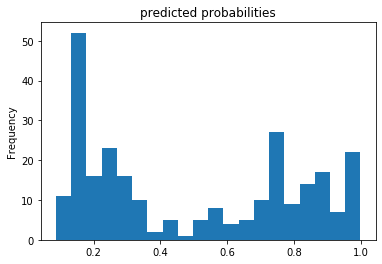

In [99]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

In [136]:
for pred in pred_dicts:
    print(pred['probabilities'])

[0.86117154 0.13882853]
[0.2895729 0.7104271]
[0.10532162 0.89467835]
[0.17232004 0.82768   ]
[0.5805811  0.41941884]
[0.20281467 0.7971853 ]
[0.31756786 0.68243206]
[0.83760315 0.16239683]
[0.2761423 0.7238577]
[0.2120056 0.7879943]
[0.23299219 0.7670078 ]
[0.83832437 0.16167565]
[0.09215167 0.90784836]
[0.41672242 0.5832776 ]
[0.09991685 0.9000831 ]
[0.23123561 0.7687644 ]
[0.7266496  0.27335036]
[0.12418895 0.875811  ]
[0.44887936 0.5511207 ]
[0.8514426  0.14855745]
[0.8363722  0.16362782]
[0.83626485 0.16373508]
[0.2593981 0.7406019]
[0.8662125 0.1337875]
[0.24251738 0.75748265]
[0.28412628 0.7158738 ]
[0.4511116  0.54888844]
[0.25369948 0.7463005 ]
[0.70295143 0.29704863]
[0.08438778 0.91561216]
[0.7755195  0.22448055]
[0.10387293 0.8961271 ]
[0.6893529 0.3106471]
[0.22895728 0.7710427 ]
[0.51593506 0.4840649 ]
[0.84877133 0.15122874]
[0.64692014 0.35307994]
[0.73520535 0.2647946 ]
[0.02944431 0.9705557 ]
[0.8531022  0.14689778]
[0.14657797 0.85342205]
[0.82538897 0.17461099]
[0.3

In [130]:
print(f'This person: \n{dfeval.loc[3]}')
print(f'Did they survive? {y_eval[3]}')
print(f'redicted survival {pred_dicts[3]["probabilities"][1]}')

This person: 
sex                        female
age                          55.0
n_siblings_spouses              0
parch                           0
fare                         16.0
class                      Second
deck                      unknown
embark_town           Southampton
alone                           y
Name: 3, dtype: object
Did they survive? 1
Predicted survival 0.8276799917221069


# Classification

In [139]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf

import pandas as pd